# Naive Bayes

###  Introduction
Bayes' theorem is the premier method for understanding the probability of some event $P(A|B)$, given some new information, $P(B|A)$, and a prior belief in the probability of the event, P(A):
$$
P(A | B) = \frac{P(B|A)P(A)}{P(B)}
$$

The Bayesian method's popularity has skyrocked in the last decade, more and more rivaling the traditional frequentist applications in academia, government, and business. In machine learning, one applicaiton of Bayes' theorem to classifican comes in the form of the naive Bayes classifier. Naive Bayes classifiers combine a number of desirable qualities in practical machine learning into a single classifier:

1. An intuitive approach
2. The ability to work with small data
3. Low computation costs for training and prediction
4. Often solid results in a variety of settigns

Specifically, a naive bayes classifier is based on:
$$
P(y | x_1, ..., x_j) = \frac{P(x_1, ..., x_j | y)P(y)}{P(x_1,...,x_j)}
$$
where,
* $P(y | x_1, ..., x_j)$ is called the *posterior* and is the probability that an observation is class y given observation's values for the j features, $x_1, ..., x_j$
* $P(x_1, ..., x_j)$ is called likelihood and is the *likelihood* of an observation's values for features, $x_1, ..., x_j$, given their class y.
* $P(y)$ is called the *prior* and is our belief for the probability of class y before looking at the data
* P($x_1, ..., x_j$) is called the *marginal probability*

In naive Bayes, we compare an obsrvation's posterior values for each possible class. Specifically, because the marginal probability is constant across these comparisons, we compare the numerators of the posterior for each class. For each observation the class with the greatest posterior numerator becomes the predicted class, $\hat y$.

There are two important things to note about naive Bayes classifiers.

1. for each feature in the data, we have to assume the statistical distribution of the likelihood, $P(x_1, ..., x_j)$.
- the common distributions are the normal (Gaussian), multinomial, and Bernoulli distributions.
- the distribution chose is often determined by the nature of the features (continuous, binary, etc.)

2. naive Bayes gets its name because we assume that each feature, and its resulting likelihood, is independent. This "naive" assumption is frequently wrong, yet in practice does little to prevent building high quality classifiers

<h4> Ad click Project </h4>

Let us now start implementing what we learned from the previous section into python codes. We will use a website data of Customers to understand which customer will be click the AD, by the end of this section we will be able to make predictions using our "home-made" Logistic Regression.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': cutomer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Ivy_Machine_Learning/20_Naives_Bayes

/content/drive/My Drive/Ivy_Machine_Learning/20_Naives_Bayes


In [ ]:
add_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [ ]:
import pandas as pd
# import the dataset
add_data=pd.read_csv("advertising.csv")
add_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='Clicked on Ad'
Predictors=['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']

X=add_data[Predictors].values
y=add_data[TargetVariable].values

# # Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data.

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [ ]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 5)
(800,)
(200, 5)
(200,)


## Training a Classifier for Continuous Features

The most common type of naive Bayes classifier is the Gaussian naive Bayesa. In Gaussian naive Bayesam we assuem that the likelihood of the feature values, x, given an observation is of class y, follows a normal distribution:
$$
p(x_j | y) = \frac{1}{\sqrt{2\pi \sigma_y^2}} e^{-\frac{(x_j - \mu_y)^2}{2\sigma_y^2}}
$$
where $\sigma_y^2$ and $\mu_y$ are the variance and mean values of feature x_j for class y. Because of the assumption of the normal distribution, Gaussian naive Bayes is best used in cases when all our features are continuous.

One of the interesting aspects of naive Bayes classifiers is that they allow us to assign a prior belief over the respect target classes. We can do this using `GaussianNB`'s `priors` parameter, which takes in a list of the probabilities assigned to each class of the target vector

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB(priors=[0.5, 0.5]) # 0.5: prior probabilites belonging to each class
print(classifier)

GaussianNB(priors=[0.5, 0.5])


In [ ]:
GNB = classifier.fit(X_train,y_train)
prediction=GNB.predict(X_test)

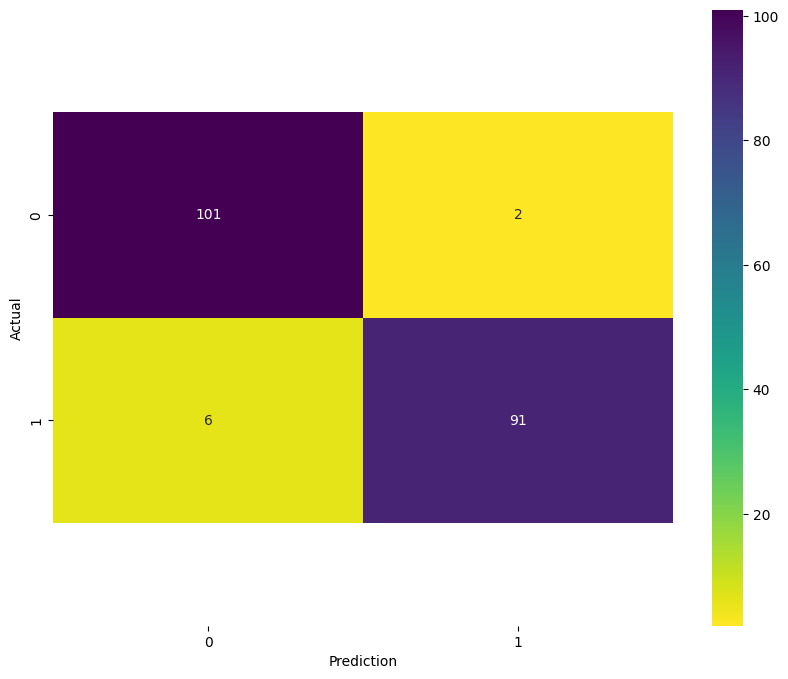

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       103
           1       0.98      0.94      0.96        97

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [ ]:
# import necessary packages to measure model performace
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Checking Confusion Metrix
cnf_matrix = confusion_matrix(y_test, prediction)

# confusion metrics
plt.figure(figsize=(10,8))
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'viridis_r', fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, prediction))

In [ ]:
# import necessary packages to measure model performace
from sklearn.metrics import f1_score
# Printing the Overall Accuracy of the model
F1_Score=f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Accuracy of the model on Testing Sample Data: 0.96


##  Training a Classifier for Multinomial naive Bayes
Multinomial naive Bayes works similarly to Gaussian naive Bayes, but the features are assumed to be multinomial distributed. In practice this means that this classifier is
commonly used when we have discrete data. One of the most common uses is text classification using bag of words or tf-idf approaches

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(class_prior=[.5,.5])
print(classifier)

MultinomialNB(class_prior=[0.5, 0.5])


In [ ]:
MNB=classifier.fit(X_train,y_train)
prediction = MNB.predict(X_test)

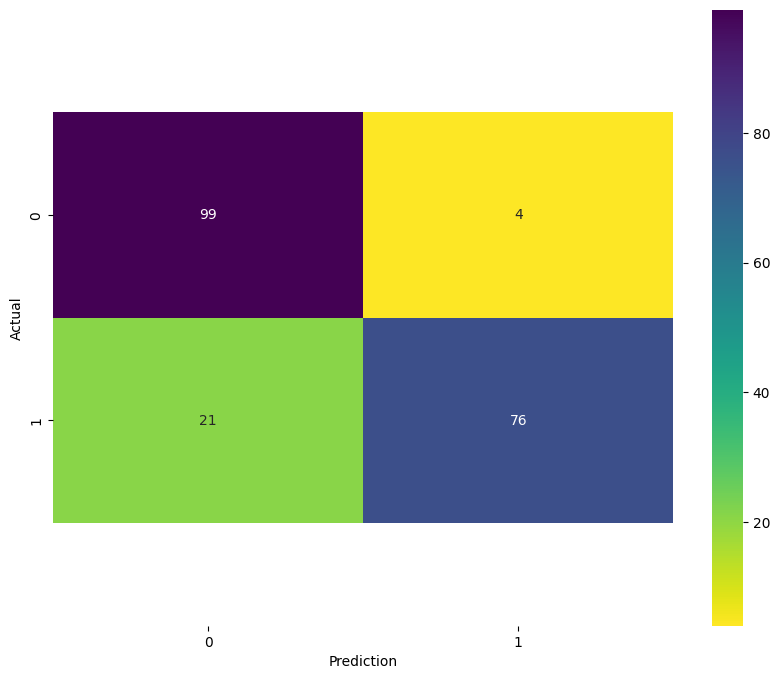

              precision    recall  f1-score   support

           0       0.82      0.96      0.89       103
           1       0.95      0.78      0.86        97

    accuracy                           0.88       200
   macro avg       0.89      0.87      0.87       200
weighted avg       0.89      0.88      0.87       200



In [ ]:
# Checking Confusion Metrix
cnf_matrix = confusion_matrix(y_test, prediction)

# confusion metrics
plt.figure(figsize=(10,8))
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'viridis_r', fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, prediction))

In [ ]:
# Printing the Overall Accuracy of the model
F1_Score=f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Accuracy of the model on Testing Sample Data: 0.87


## Training a Naive Bayes Classifier for Bernoulli naive Bayes
The Bernoulli naive Bayes classifier assumes that all our features are binary such that they take only two values (e.g. a nominal categorical feature that has been one-hot encoded). Like its multinomial cousin, Bernoulli naive Bayes is often used in text classification, when our feature matrix is simply the presence or absence of a word in a document

In [ ]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB

features = np.random.randint(2, size=(100, 3))
target = np.random.randint(2, size=(100, 1)).ravel()

In [ ]:
features

array([[0, 0, 0],
       [1, 1, 1],
       [0, 0, 1],
       [1, 1, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 1],
       [0, 1, 1],
       [0, 0, 0],
       [0, 1, 0],
       [1, 0, 1],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [0, 1, 1],
       [0, 1, 1],
       [1, 1, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 1],
       [0, 0, 1],
       [0, 0, 0],
       [0, 1, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 0],
       [0, 1, 1],
       [1, 0, 0],
       [1, 1, 1],
       [0, 0, 1],
       [1, 1, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 0, 0],
       [1, 1, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 0],
       [1, 1, 1],
       [1, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 1, 0],
       [1, 0, 1],
       [1, 0, 1],
       [1, 1, 0],
       [0,

In [ ]:
classifier = BernoulliNB(class_prior=[0.25, 0.5])
model = classifier.fit(features, target)

In [ ]:
model.predict([[1,0,1]])

array([1])

In [ ]:
# You choose the type of Naive Bayes Algorithm - DEPENDING ON YOUR PRIOR DISTRIBUTION

In [ ]:
# NLP - Natural Language Processing

# Field of AI - which is focused on understanding human language
# Data : Sound -> Text -> Play some music -> Communicate with the computer -> NLP
# Language -> Process -> Machine understandable format -> Train a model - where the machine learns to take a decision
# by understanding text and making an action


# Computer Vision